In [2]:
#I, Class boundaries and posterior probabilities
import math
import numpy as np
import matplotlib.pyplot as plt
def gauss2D(x,m,C):
    Ci = np.linalg.inv(C)#Compute the (multiplicative) inverse of a matrix.
    dC = np.linalg.det(C)#Compute the determinant of an array.
    num=np.exp(-0.5*np.dot((x-m).T, np.dot(Ci,(x-m))))
    den=2*np.pi*math.sqrt(dC)
    return num/den

 

In [3]:
def twoDGaussianPlot(nx,ny,m,C):
    x=np.linspace(-5,5,nx)#Return evenly spaced numbers over a specified interval.
    y=np.linspace(-5,5,ny)
    X,Y= np.meshgrid(x,y,indexing='ij')
    
    Z=np.zeros([nx,ny])
    for i in range(nx):
        for j in range(ny):
            xvec=np.array([X[i,j],Y[i,j]])
            Z[i,j]=gauss2D(xvec,m,C)
    return X,Y,Z      

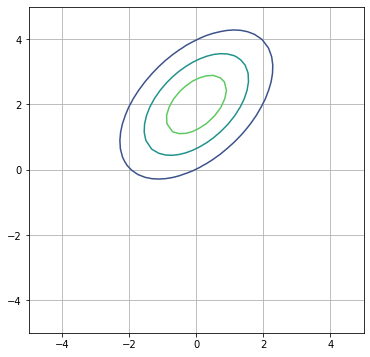

In [4]:
nx,ny=50,40
plt.figure(figsize=(6,6))

m1=np.array([0,2])
C1=np.array([[2,1],[1,2]], np.float32)
Xp, Yp, Zp=twoDGaussianPlot(nx,ny,m1,C1)
plt.contour(Xp,Yp,Zp,3)
plt.grid(True)

In [5]:
def posteriorPlot(nx,ny,m1,C1,m2,C2,P1,P2):
    x=np.linspace(-5,5,nx)#Return evenly spaced numbers over a specified interval.
    y=np.linspace(-5,5,ny)#Return evenly spaced numbers over a specified interval.
    X,Y=np.meshgrid(x,y,indexing='ij')
    
    Z=np.zeros([nx,ny])
    for i in range(nx):
        for j in range(ny):
            xvec=np.array([X[i,j],Y[i,j]])
            num=P1*gauss2D(xvec,m1,C1)
            den=P1*gauss2D(xvec,m1,C1)+P2*gauss2D(xvec,m2,C2)
            Z[i,j]=num/den
    return X,Y,Z

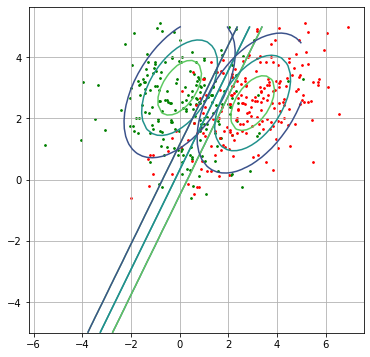

In [6]:
nx,ny=50,40
plt.figure(figsize=(6,6))

p1,p2=0.5,0.5
m1=np.array([0,3])
m2=np.array([3,2.5])
C1=np.array([[2,1],[1,2]], np.float32)
C2=np.array([[2,1],[1,2]], np.float32)

A=np.linalg.cholesky(C1)
Xs1=np.random.randn(200,2)
Xs2=np.random.randn(200,2)
Ys1=Xs1 @ A+m1
Ys2=Xs2 @ A+m2


Xp1, Yp1, Zp1=posteriorPlot(nx,ny,m1,C1,m2,C2,p1,p2)
Xp2, Yp2, Zp2=posteriorPlot(nx,ny,m2,C2,m1,C1,p2,p1)
X1, Y1, Z1=twoDGaussianPlot(nx,ny,m1,C1)
X2, Y2, Z2=twoDGaussianPlot(nx,ny,m2,C2)


plt.contour(Xp1,Yp1,Zp1,3)
plt.contour(X1,Y1,Z1,3)
plt.contour(Xp2,Yp2,Zp2,3)
plt.contour(X2,Y2,Z2,3)
plt.scatter(Ys1[:,0],Ys2[:,1],s=3,c='g')
plt.scatter(Ys2[:,0],Ys2[:,1],s=3,c='r')
plt.grid(True)  

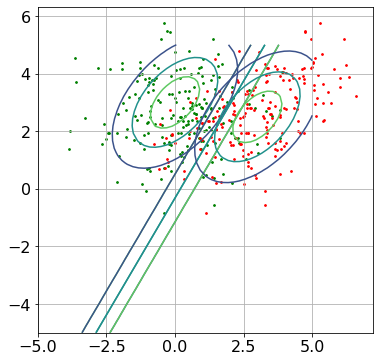

In [75]:

#Change the prior
nx,ny=50,40
plt.figure(figsize=(6,6))

p1,p2=0.7,0.3
m1=np.array([0,3])
m2=np.array([3,2.5])
C1=np.array([[2,1],[1,2]], np.float32)
C2=np.array([[2,1],[1,2]], np.float32)

A=np.linalg.cholesky(C1)
Xs1=np.random.randn(200,2)
Xs2=np.random.randn(200,2)
Ys1=Xs1 @ A+m1
Ys2=Xs2 @ A+m2

Xp1, Yp1, Zp1=posteriorPlot(nx,ny,m1,C1,m2,C2,p1,p2)
Xp2, Yp2, Zp2=posteriorPlot(nx,ny,m2,C2,m1,C1,p2,p1)
X1, Y1, Z1=twoDGaussianPlot(nx,ny,m1,C1)
X2, Y2, Z2=twoDGaussianPlot(nx,ny,m2,C2)
plt.contour(Xp1,Yp1,Zp1,3)
plt.contour(X1,Y1,Z1,3)
plt.contour(Xp2,Yp2,Zp2,3)
plt.contour(X2,Y2,Z2,3)
plt.scatter(Ys1[:,0],Ys2[:,1],s=3,c='g')
plt.scatter(Ys2[:,0],Ys2[:,1],s=3,c='r')
plt.grid(True)  

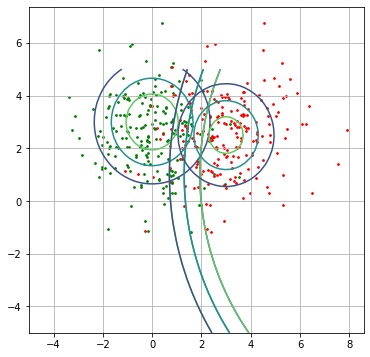

In [8]:
#Change the variance-covariance matrix
nx,ny=50,40
plt.figure(figsize=(6,6))

p1,p2=0.5,0.5
m1=np.array([0,3])
m2=np.array([3,2.5])
C1=np.array([[2,0],[0,2]], np.float32)
C2=np.array([[1.5,0],[0,1.5]], np.float32)

A=np.linalg.cholesky(C1)
Xs1=np.random.randn(200,2)
Xs2=np.random.randn(200,2)
Ys1=Xs1 @ A+m1
Ys2=Xs2 @ A+m2

Xp1, Yp1, Zp1=posteriorPlot(nx,ny,m1,C1,m2,C2,p1,p2)
Xp2, Yp2, Zp2=posteriorPlot(nx,ny,m2,C2,m1,C1,p2,p1)
X1, Y1, Z1=twoDGaussianPlot(nx,ny,m1,C1)
X2, Y2, Z2=twoDGaussianPlot(nx,ny,m2,C2)
plt.contour(Xp1,Yp1,Zp1,3)
plt.contour(X1,Y1,Z1,3)
plt.contour(Xp2,Yp2,Zp2,3)
plt.contour(X2,Y2,Z2,3)
plt.scatter(Ys1[:,0],Ys2[:,1],s=3,c='g')
plt.scatter(Ys2[:,0],Ys2[:,1],s=3,c='r')
plt.grid(True)  

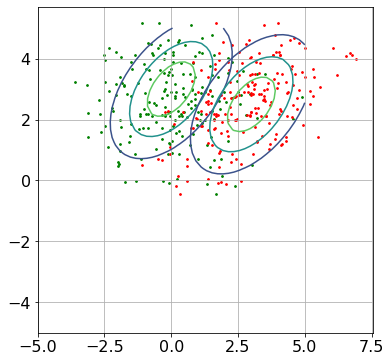

In [15]:
#II, Fisher discriminant direction
#1#2,Plot contour and scatter
nx,ny=50,40
plt.figure(figsize=(6,6))
m1=np.array([0,3])
m2=np.array([3,2.5])
C1=np.array([[2,1],[1,2]], np.float32)
C2=np.array([[2,1],[1,2]], np.float32)
A=np.linalg.cholesky(C1)
Xs1=np.random.randn(200,2)
Xs2=np.random.randn(200,2)
Ys1=Xs1 @ A+m1
Ys2=Xs2 @ A+m2
plt.scatter(Ys1[:,0],Ys2[:,1],s=3,c='g')
plt.scatter(Ys2[:,0],Ys2[:,1],s=3,c='r')
X1, Y1, Z1=twoDGaussianPlot(nx,ny,m1,C1)
X2, Y2, Z2=twoDGaussianPlot(nx,ny,m2,C2)
plt.contour(X1,Y1,Z1,3)
plt.contour(X2,Y2,Z2,3)
plt.grid(True)  

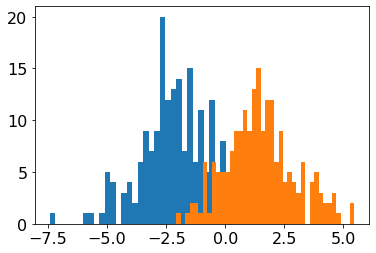

In [16]:
#3#4,Fisher discriminant direction
import matplotlib
m1=np.array([0,3])
m2=np.array([3,2.5])
C=np.array([[2,1],[1,2]], np.float32)
Ci= np.linalg.inv(2*C)
uF=Ci @ (m2-m1)# Compute the Fisher Linear Discriminant direction
NumDataPerClass=200
A=np.linalg.cholesky(C) #Return the Cholesky decomposition
X1=np.random.randn(NumDataPerClass,2) #Return a sample (or samples) from the “standard normal” distribution.
Y1=X1 @ A+m1# customise to corresponding mean and covariance

X2=np.random.randn(NumDataPerClass,2)
Y2=X2 @ A +m2
#plt.scatter(Y1,Y2,c='green')# with mean of m1,m2 and covariance of C

yp1=Y1 @ uF
yp2=Y2 @ uF
matplotlib.rcParams.update({'font.size':16})
plt.hist(yp1, bins=40)
plt.hist(yp2, bins=40)
plt.savefig('histogramprojections.png')

-7.423858222406572 5.452143312607708


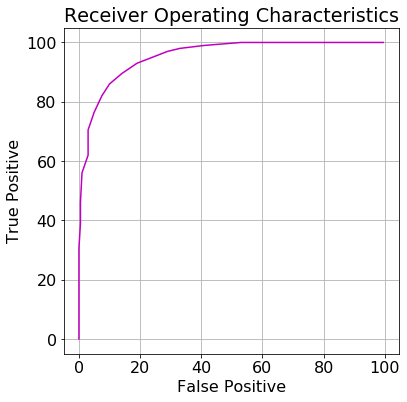

In [19]:
#5,Compute and plot a ROC curve

#Define a range over which to slide a threshold

pmin=np.min(np.array((np.min(yp1),np.min(yp2))))
pmax=np.max(np.array((np.max(yp1),np.max(yp2))))

print(pmin,pmax)

#Set up an array of thresholds

nRocPoints=50
thRange=np.linspace(pmin,pmax,nRocPoints)
ROC=np.zeros((nRocPoints,2))

#Compute True Positives and False Positives at each threshold

for i in range(len(thRange)):
    thresh=thRange[i]
    TP=len(yp2[yp2>thresh])*100/len(yp2)
    FP=len(yp1[yp1>thresh])*100/len(yp1)
    ROC[i,:]=[TP,FP]
    
#Plot ROC curve
fig,ax=plt.subplots(figsize=(6,6))
ax.plot(ROC[:,1],ROC[:,0],c='m')
ax.set_xlabel('False Positive')
ax.set_ylabel('True Positive')
ax.set_title('Receiver Operating Characteristics')
ax.grid(True)
plt.savefig('rocCurve.png')

In [34]:
#6,Computer the AUC
np.trapz(ROC[:,0][::-1] , x=ROC[:,1][::-1] )

9495.25

In [17]:
#Demonstration of Integration(Compute the AUC)
np.trapz([1,2,3], x=[4,6,9])  
#（6-4）*(（（2-1）/2）+1)+（9-6）*(（（3-2）/2）+2)=10.5  
#https://en.wikipedia.org/wiki/Trapezoidal_rule
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.trapz.html

10.5

In [58]:
#7 Compute the accuracy
#Accuracy (ACC) = (Σ True positive + Σ True negative)/Σ Total population
print(ROC.shape)
print(ROC[:,0][9])
print(ROC[:,1][9])
print(ROC)

(50, 2)
100.0
97.0
[[100.   99.5]
 [100.   99.5]
 [100.   99.5]
 [100.   99.5]
 [100.   99.5]
 [100.   99.5]
 [100.   99. ]
 [100.   98.5]
 [100.   98.5]
 [100.   97. ]
 [100.   95. ]
 [100.   93.5]
 [100.   92. ]
 [100.   91. ]
 [100.   89.5]
 [100.   86. ]
 [100.   81.5]
 [100.   77. ]
 [100.   70.5]
 [100.   61.5]
 [100.   53. ]
 [ 99.5  47. ]
 [ 99.   41. ]
 [ 98.   33. ]
 [ 97.   29. ]
 [ 95.   24. ]
 [ 93.   19. ]
 [ 89.5  14. ]
 [ 86.   10. ]
 [ 82.    7.5]
 [ 76.5   5. ]
 [ 70.5   3. ]
 [ 62.    3. ]
 [ 56.    1. ]
 [ 46.    0.5]
 [ 39.    0.5]
 [ 30.5   0. ]
 [ 24.5   0. ]
 [ 20.5   0. ]
 [ 17.    0. ]
 [ 14.5   0. ]
 [ 12.5   0. ]
 [ 11.    0. ]
 [  7.5   0. ]
 [  5.    0. ]
 [  4.    0. ]
 [  2.    0. ]
 [  1.    0. ]
 [  1.    0. ]
 [  0.    0. ]]


In [72]:
print(ROC[:,0][28])#TP
print(ROC[:,1][28])#FP

86.0
10.0


In [68]:
#Compute the distance between every threshold  and the bottom right corner(i.e. FP=100,TP=0)
R={}
for i in range(50):
    r=round((ROC[:,0][i]**2+(100-ROC[:,1][i])**2)**0.5,2)
    R[i]=r

In [77]:
#Find the max distance which is the best threshold in this curve(Getting key with maximum value in dictionary)
#https://stackoverflow.com/questions/268272/getting-key-with-maximum-value-in-dictionary
#print(R)
import operator
max(R.items(), key=operator.itemgetter(1))[0]

28

In [74]:
#Accuracy (ACC) = (Σ True positive + Σ True negative)/Σ Total population
((ROC[:,0][28]/100)*200+(1-ROC[:,1][28]/100)*200)/400

0.88

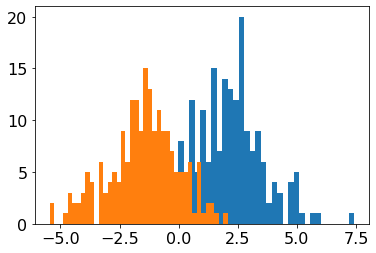

In [39]:
#8,Projection on a random direction
yp11=Y1 @ -uF
yp22=Y2 @ -uF

matplotlib.rcParams.update({'font.size':16})
plt.hist(yp11, bins=40)
plt.hist(yp22, bins=40)
plt.savefig('histogramprojections.png')

[ 3.  -0.5]


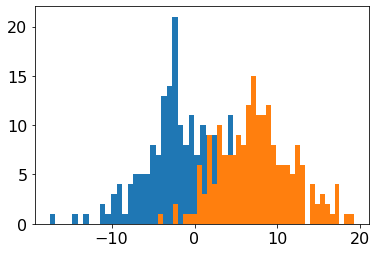

In [45]:
#Projection on the direction connecting the means of the two classes
M=m2-m1
print(M)

yp1M=Y1 @ M
yp2M=Y2 @ M

matplotlib.rcParams.update({'font.size':16})
plt.hist(yp1M, bins=40)
plt.hist(yp2M, bins=40)
plt.savefig('histogramprojections.png')

-7.423858222406572 5.452143312607708


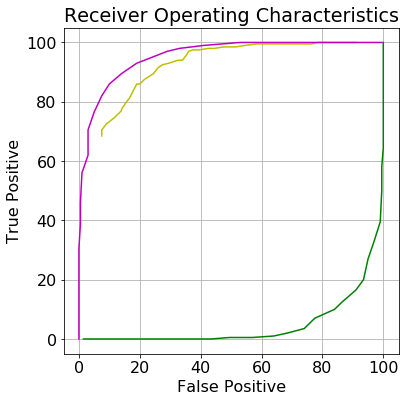

In [46]:
#Compute and plot a ROC curve

#Define a range over which to slide a threshold-------------------------------

pmin11=np.min(np.array((np.min(yp11),np.min(yp22))))
pmax11=np.max(np.array((np.max(yp11),np.max(yp22))))

print(pmin,pmax)

#Set up an array of thresholds

nRocPoints11=50
thRange11=np.linspace(pmin11,pmax11,nRocPoints11)
ROC11=np.zeros((nRocPoints11,2))

#Compute True Positives and False Positives at each threshold

for i in range(len(thRange11)):
    thresh11=thRange[i]
    TP11=len(yp22[yp22>thresh11])*100/len(yp22)
    FP11=len(yp11[yp11>thresh11])*100/len(yp11)
    ROC11[i,:]=[TP11,FP11]

    
#Define a range over which to slide a threshold---------------------------

pmin1M=np.min(np.array((np.min(yp1M),np.min(yp2M))))
pmax1M=np.max(np.array((np.max(yp1M),np.max(yp2M))))


#Set up an array of thresholds

nRocPoints1M=50
thRange1M=np.linspace(pmin1M,pmax1M,nRocPoints1M)
ROC1M=np.zeros((nRocPoints1M,2))

#Compute True Positives and False Positives at each threshold

for i in range(len(thRange1M)):
    thresh1M=thRange[i]
    TP1M=len(yp2M[yp2M>thresh1M])*100/len(yp2M)
    FP1M=len(yp1M[yp1M>thresh1M])*100/len(yp1M)
    ROC1M[i,:]=[TP1M,FP1M]    

#Plot ROC curve
fig,ax=plt.subplots(figsize=(6,6))
ax.plot(ROC11[:,1],ROC11[:,0],c='g')
ax.plot(ROC1M[:,1],ROC1M[:,0],c='y')
ax.plot(ROC[:,1],ROC[:,0],c='m')
ax.set_xlabel('False Positive')
ax.set_ylabel('True Positive')
ax.set_title('Receiver Operating Characteristics')
ax.grid(True)
plt.savefig('rocCurve.png')

In [51]:
#Computer the AUC of Fisher LDA
print(np.trapz(ROC[:,0][::-1] , x=ROC[:,1][::-1] ))
#Computer the AUC of a random direction
print(np.trapz(ROC11[:,0][::-1] , x=ROC11[:,1][::-1] ))
#Computer the AUC of the direction connecting the means of two classes
print(np.trapz(ROC1M[:,0][::-1] , x=ROC1M[:,1][::-1] ))

9495.25
465.75
7893.25
